# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression


#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset


In [2]:
data = pd.read_csv('data_skew_imputed_outliers_fixed_min_max2.csv')

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,...,C4_Imput_min_max,C5_log_Imput_p_outliner_fix_min_max,C6_log_Imput_p_outliner_fix_min_max,C7_log_Imput_outliner_fix_min_max,T3_Imput_ratio_skew_outliner_fix_min_max,T4_Imput_ratio_skew_outliner_fix_min_max,T5_Imput_ratio_skew_outliner_fix_min_max,S1_Imput_ratio_skew_outliner_fix_min_max,S2_Imput_ratio_skew_outliner_fix_min_max,S3_Imput_ratio_skew_outliner_fix_min_max
0,0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,...,0.749962,0.570295,0.583333,0.405237,0.645300,0.538267,0.558627,0.482158,0.543764,0.484041
1,1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,...,0.583748,0.063230,0.000000,0.317003,0.546400,0.550357,0.478716,0.241128,0.657184,0.479777
2,2,2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,...,0.717213,0.340587,0.000000,0.154585,0.649815,0.528197,0.756553,0.637358,0.308399,0.521087
3,3,3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,...,0.714502,0.306943,0.000000,0.173269,0.722131,0.262080,0.753169,0.920559,0.389123,0.653527
4,4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,...,0.499347,0.495493,0.262500,0.729625,0.442262,0.391683,0.396120,0.435805,0.597081,0.510226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,655,ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,...,0.654351,0.542871,0.403846,0.571608,0.757798,0.461148,0.456017,0.662739,0.453682,0.629947
656,656,656,ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,...,0.865985,0.440524,0.000000,0.314615,0.619883,0.557136,0.626932,0.506148,0.538799,0.601860
657,657,657,ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,...,0.755255,0.182916,0.000000,0.415130,0.453956,0.558770,0.379069,0.390411,0.533452,0.398712
658,658,658,ZUMZ,Zumiez Inc,5600,19.0,17.0,15.0,12.435000,78.0,...,0.762539,0.179460,0.984375,0.512588,0.650401,0.737456,0.231005,0.687671,0.210316,0.701527


In [4]:
usecols = ['I3_Imput' , 'Y1','Y2',
       'div_manufacturing',
           'div_other', 
           'div_services',
         
      'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 
       
       'C3_cube_root', 'C7_log', 'C5_log', 'C6_log', 'C1_Imput', 'C2_Imput',
       'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput', 'C6_log_Imput',
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
       'C7_log_Imput_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max',
       'C3_cube_root_Imput_min_max', 'C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'I1', 'I2', 'I3', 'P(IPO)', 'P(H)',
       'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2',
       'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I3_Imput', 'division',
       'div_manufacturing', 'div_other', 'div_services', 'T1_Imput',
       'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput', 'S1_Imput', 'S2_Imput',
       'S3_Imput', 'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 'P(1Day)_Imput',
       'P(H)_Imput', 'P(L)_Imput', 'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2',
       'T4_Imput_ratio_skew', 'T3_Imput_ratio_skew', 'T5_Imput_ratio_skew',
       'S1_Imput_ratio_skew', 'S2_Imput_ratio_skew', 'S3_Imput_ratio_skew',
       'C5_skew', 'C3_skew', 'C3_cube_root', 'C7_log', 'C6_log', 'C1_Imput',
       'C2_Imput', 'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput',
       'C6_log_Imput', 'C7_log_Imput', 'C3_cube_root_Imput_p',
       'C5_log_Imput_p', 'C6_log_Imput_p', 'C1_

In [6]:
import pandas as pd
df = pd.read_csv('data_skew_imputed_outliers_fixed_min_max2.csv' , usecols = [ 'C3_cube_root_Imput_p_min_max', 'Y1','Y2', 
                                                               'C1_Imput_outliner_fix_min_max',
                                                                'C2_Imput',
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                                'C6_log_Imput_p_outliner_fix_min_max',
                                                                'C7_log_Imput_outliner_fix_min_max',
                                                                'div_manufacturing','div_other','div_services',
                                                                'T3_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T4_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T5_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S1_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S2_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S3_Imput_ratio_skew_outliner_fix_min_max'])
x = df
#df = pd.DataFrame(x.data, columns = x.feature_names)
#df["MEDV"] = x.target
X = df.drop(["Y1" ,"Y2"  ],1)   #Feature Matrix
y = df["Y2"].values          #Target Variable
len(X.columns)

16

In [45]:
#https://github.com/vaksakalli/spsaml_py
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
# make sure the results are repeatable
np.random.seed(999)


x =X.values
#y = df.data, df.target

# specify a wrapper to use
wrapper = DecisionTreeClassifier()

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=0)# ,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number of features: 16
spFtSel-INFO: Number of observations: 660
spFtSel-INFO: iter: 0, value: 0.598, std: 0.026, num. features: 4, best value: 0.598
spFtSel-INFO: iter: 5, value: 0.63, std: 0.029, num. features: 7, best value: 0.63
spFtSel-INFO: iter: 10, value: 0.61, std: 0.04, num. features: 6, best value: 0.63
spFtSel-INFO: iter: 15, value: 0.622, std: 0.03, num. features: 7, best value: 0.636
spFtSel-INFO: iter: 20, value: 0.618, std: 0.037, n

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.651
Indices of selected features:  [ 5  6  8  1  3 14  7]
Importance of selected features:  [0.583 0.579 0.567 0.564 0.545 0.542 0.505]
Total iterations for the optimal feature set: 36


array(['C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max',
       'C6_log_Imput_p_outliner_fix_min_max', 'div_other', 'C2_Imput',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'C5_log_Imput_p_outliner_fix_min_max'], dtype=object)

##### X.isna().sum()

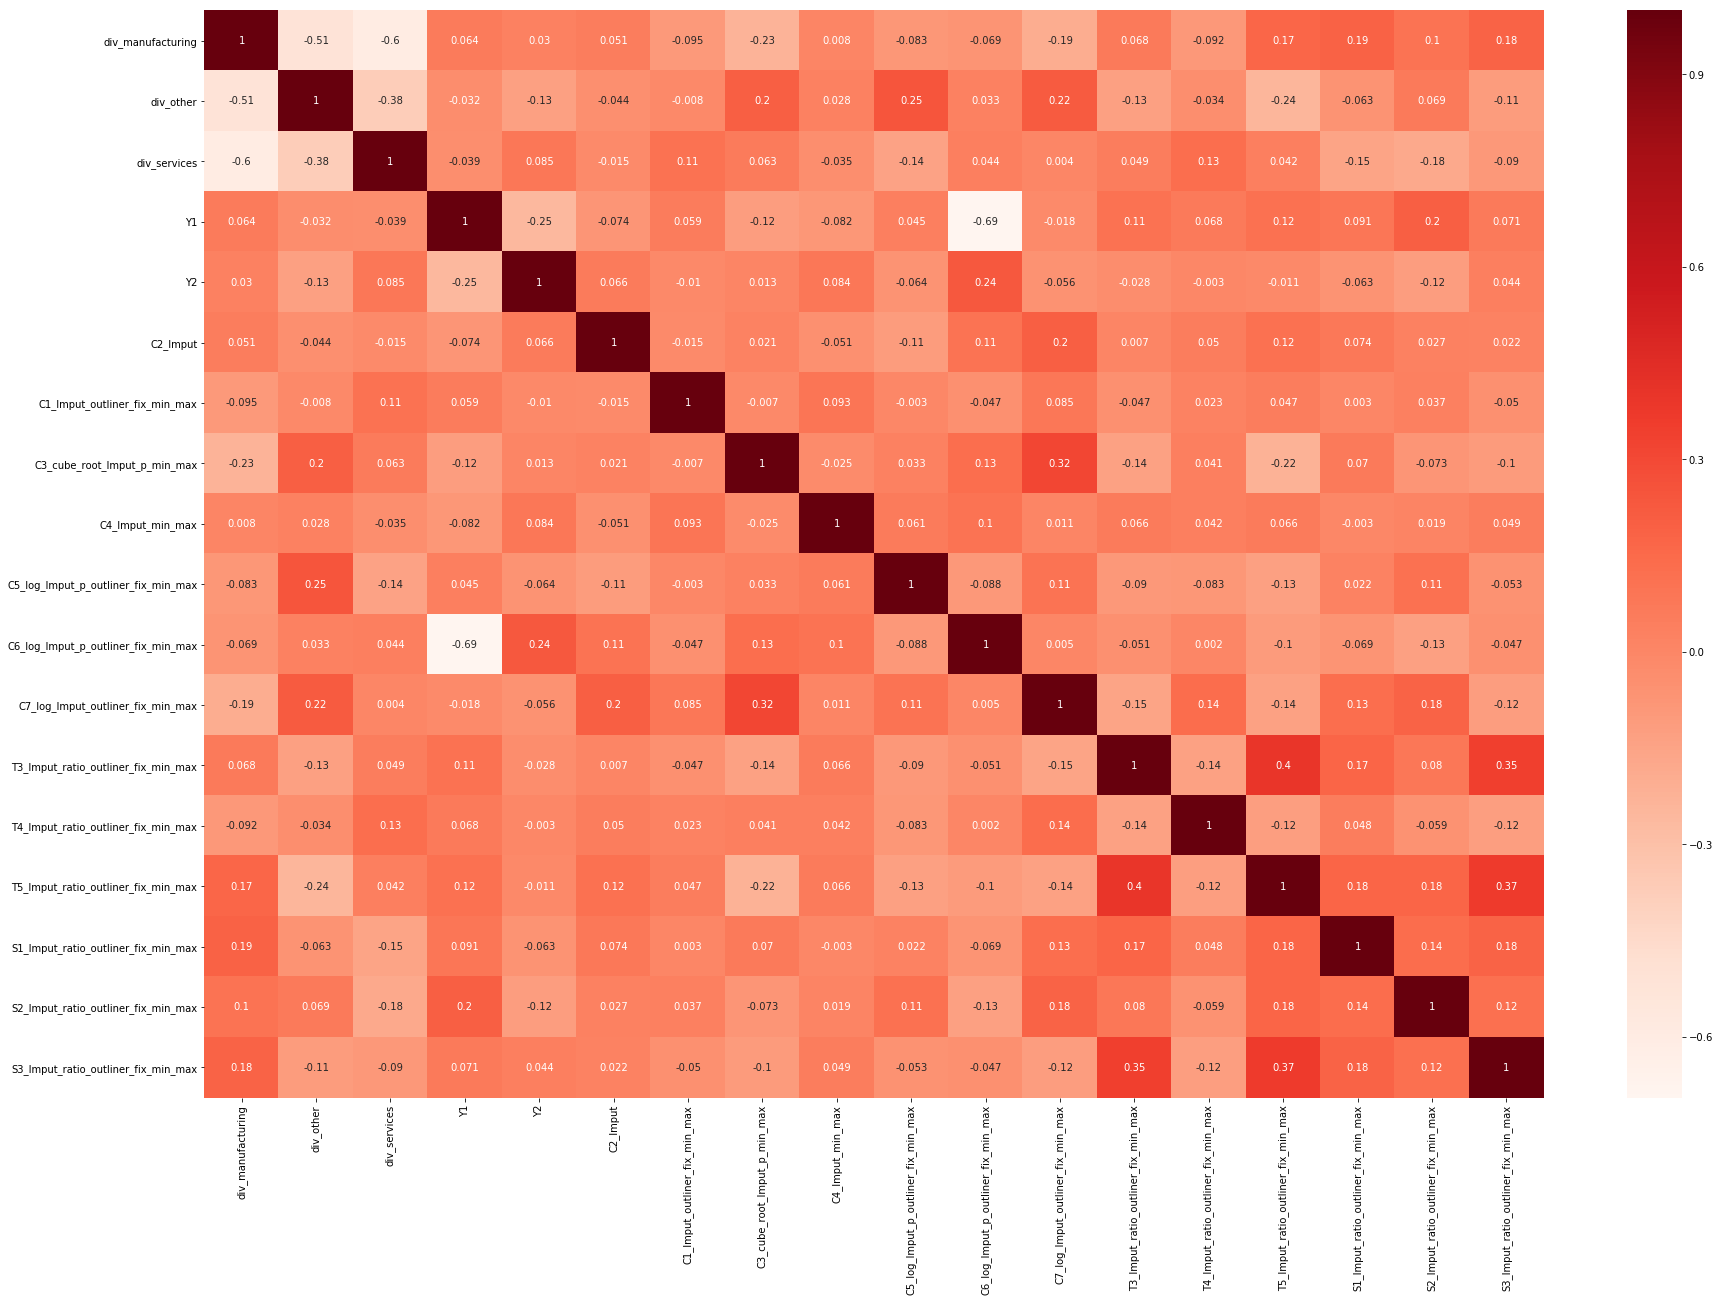

In [5]:

#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr().round(3)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
cor_target = abs(cor["Y2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Y2    1.0
Name: Y2, dtype: float64

In [7]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                  1.237206e-04
div_manufacturing                      5.596419e-05
div_other                              3.260020e-01
div_services                           6.981278e-06
C2_Imput                               1.730258e-01
C1_Imput_outliner_fix_min_max          9.575168e-01
C3_cube_root_Imput_p_min_max           7.714943e-01
C4_Imput_min_max                       5.547963e-02
C5_log_Imput_p_outliner_fix_min_max    9.179456e-01
C6_log_Imput_p_outliner_fix_min_max    6.359226e-08
C7_log_Imput_outliner_fix_min_max      5.508592e-01
T3_Imput_ratio_outliner_fix_min_max    2.477263e-01
T4_Imput_ratio_outliner_fix_min_max    6.934741e-01
T5_Imput_ratio_outliner_fix_min_max    6.510155e-01
S1_Imput_ratio_outliner_fix_min_max    2.731042e-01
S2_Imput_ratio_outliner_fix_min_max    8.786516e-02
S3_Imput_ratio_outliner_fix_min_max    7.253012e-02
dtype: float64

In [8]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['div_manufacturing', 'div_services', 'C6_log_Imput_p_outliner_fix_min_max', 'S2_Imput_ratio_outliner_fix_min_max']


In [179]:
feature_with_p_max

'C2_Imput'

In [49]:
#no of features
nof_list=np.arange(1,16)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.750000


array([0.        , 1.        , 0.        , 0.        , 0.51807229,
       0.71078429, 0.62750476, 0.        , 0.435889  , 0.03083242,
       0.77476517, 0.37282197, 0.55800624, 0.37393156, 0.52847657])

In [44]:
precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2]

0.6633608815426997

In [15]:
len(df)

660

In [19]:
for i in range(1, len(X.columns)):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes
    rfe = RFE(model, i)
    rfe = rfe.fit(X,y)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

1
Model with the best 1 features
[False False False False False False False False  True False False False
 False False False False]
[12  4 11  8 16 15  3 14  1  9  7 13 10  5  2  6]
2
Model with the best 2 features
[False False False False False False False False  True False False False
 False False  True False]
[11  3 10  7 15 14  2 13  1  8  6 12  9  4  1  5]
3
Model with the best 3 features
[False False False False False False  True False  True False False False
 False False  True False]
[10  2  9  6 14 13  1 12  1  7  5 11  8  3  1  4]
4
Model with the best 4 features
[False  True False False False False  True False  True False False False
 False False  True False]
[ 9  1  8  5 13 12  1 11  1  6  4 10  7  2  1  3]
5
Model with the best 5 features
[False  True False False False False  True False  True False False False
 False  True  True False]
[ 8  1  7  4 12 11  1 10  1  5  3  9  6  1  1  2]
6
Model with the best 6 features
[False  True False False False False  True False  True Fa

In [188]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model,4)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['div_other', 'C4_Imput_min_max', 'C6_log_Imput_p_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max'],
      dtype='object')


In [8]:
y1 = data.Y1
y2 = data.Y2

In [190]:


cols_y2 =  [ 'Y1','Y2', 'C6_log_Imput_p_outliner_fix_min_max',   
           
                                                            
                                                                'C4_Imput_min_max',
                                                       
                                                               
                                                              
            'div_other' ,
     
                                                                'T3_Imput_ratio_outliner_fix_min_max',
                                                              
                                                          
                                                                
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                                'S3_Imput_ratio_outliner_fix_min_max' ]
                                                            

In [191]:

cols_y2_1 =  [ 'Y1','Y2', 'C6_log_Imput_p_outliner_fix_min_max',   
           
                                                            
                                                         
                                                       
                                                               
                                                              
            'div_other' ,
     
                                                                'T3_Imput_ratio_outliner_fix_min_max',
                                                              
                                                          
                                                               
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                                'S3_Imput_ratio_outliner_fix_min_max' ]
                                                            

In [23]:
selected_features_rfe_2 =['div_other',  'C6_log_Imput_p_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']

In [24]:
selected_features_rfe_1 = ['div_other',  'C6_log_Imput_p_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       ]

In [25]:
selected_features_rfe_3 = [  'C6_log_Imput_p_outliner_fix_min_max','T5_Imput_ratio_outliner_fix_min_max','T4_Imput_ratio_outliner_fix_min_max',
      
       'S3_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max','div_manufacturing',
       ]

In [ ]:
'C3_cube_root_Imput_p_min_max', 'Y1','Y2', 
                                                               'C1_Imput_outliner_fix_min_max',
                                                                'C2_Imput',
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                                'C6_log_Imput_p_outliner_fix_min_max',
                                                                'C7_log_Imput_outliner_fix_min_max',
                                                                'div_manufacturing','div_other','div_services',

In [360]:
selected_features_rfe_5 = ['C6_log_Imput_p_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max', 'div_manufacturing',
       'C5_log_Imput_p_outliner_fix_min_max', 'C4_Imput_min_max',
       'C2_Imput']


t = [
     
     'S3_Imput_ratio_skew_outliner_fix_min_max',
   'T4_Imput_ratio_skew_outliner_fix_min_max',
   
       'C6_log_Imput_p_outliner_fix_min_max', 
     'C2_Imput',
       'S2_Imput_ratio_skew_outliner_fix_min_max', 
       'C5_log_Imput_p_outliner_fix_min_max']

In [361]:
predictors_y2 = data[t[:]]
#predictors_y2.pop('Y1')
#predictors_y2.pop('Y2')
predictors_y2.head()

,S3_Imput_ratio_skew_outliner_fix_min_max,T4_Imput_ratio_skew_outliner_fix_min_max,C6_log_Imput_p_outliner_fix_min_max,C2_Imput,S2_Imput_ratio_skew_outliner_fix_min_max,C5_log_Imput_p_outliner_fix_min_max
0,0.484041,0.538267,0.583333,1.0,0.543764,0.570295
1,0.479777,0.550357,0.000000,0.0,0.657184,0.063230
2,0.521087,0.528197,0.000000,1.0,0.308399,0.340587
3,0.653527,0.262080,0.000000,1.0,0.389123,0.306943
4,0.510226,0.391683,0.262500,1.0,0.597081,0.495493


In [362]:
best_features_spsa

array(['C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max',
       'C6_log_Imput_p_outliner_fix_min_max', 'div_other', 'C2_Imput',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'C5_log_Imput_p_outliner_fix_min_max'], dtype=object)

In [363]:
best_features_spsa

array(['C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max',
       'C6_log_Imput_p_outliner_fix_min_max', 'div_other', 'C2_Imput',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'C5_log_Imput_p_outliner_fix_min_max'], dtype=object)

In [364]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(predictors_y2, y2)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 6
Selected Features: [ True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1]


Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [365]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,100):
    #Model building
    clf1 = LogisticRegression()

    
    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


F1 0.6717; AUC 0.6881 
Accuracy of classifier on test set: 0.659
10-fold cross validation average accuracy of clf1: 0.619
Confusion Matrix for Classfier:
[[27  9]
 [36 60]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55        36
           1       0.87      0.62      0.73        96

    accuracy                           0.66       132
   macro avg       0.65      0.69      0.64       132
weighted avg       0.75      0.66      0.68       132



In [39]:
np.mean(f1_score_lst)

0.6724997910485595